In [1]:
import torch 
import torch.nn.functional as F
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
data ,_ = make_blobs(n_samples=300, centers=6, cluster_std=0.6, random_state=0)

tensor_data = torch.from_numpy(data).float()

centroids = tensor_data[torch.randperm(tensor_data.size(0))[:6]]

num_iterations = 100

In [5]:
for _ in range(num_iterations):
    # Calculate distances from data points to centroids
    distances = torch.cdist(tensor_data, centroids)

    # Assign each data point to the closest centroid
    _ , labels = torch.min(distances, dim=1)

    # Update centroids by taking the mean of data points assigned to each centroid
    for i in range(4):
        if torch.sum(labels == i) > 0:
            centroids[i] = torch.mean(tensor_data[labels == i], dim=0)


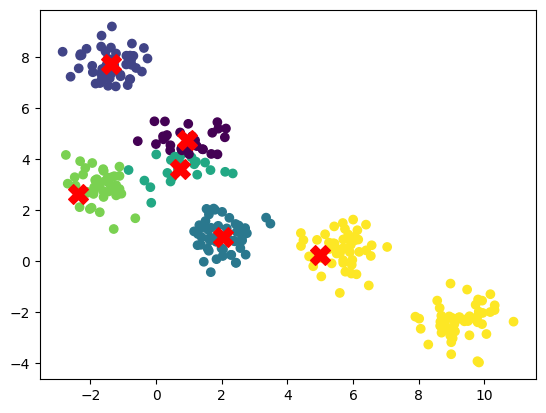

In [6]:
# Visualize clusters
plt.scatter(data[:, 0], data[:, 1], c=labels.numpy(), cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.show()